In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
studentRegistration = pd.read_csv('../data/studentRegistration.csv')
studentInfo = pd.read_csv('../data/studentInfo.csv')
studentVle = pd.read_csv('../data/vle.csv')
studentAssessment = pd.read_csv('../data/studentAssessment.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')
assessments = pd.read_csv('../data/assessments.csv')


### Merging the data

Student data

In [3]:
student_data = pd.merge(studentRegistration, studentInfo, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [4]:
student_data = pd.merge(student_data, courses, on=['code_module', 'code_presentation'], how='inner')
student_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,268
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268


Student assasment data

In [5]:
student_assesment_data = assessments.merge(studentAssessment,on=['id_assessment'],how="inner")
student_assesment_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


### Handling missing value

In [6]:
student_assesment_data.isna().sum()

code_module             0
code_presentation       0
id_assessment           0
assessment_type         0
date                 2865
weight                  0
id_student              0
date_submitted          0
is_banked               0
score                 173
dtype: int64

In [7]:
missing_scores = student_assesment_data[student_assesment_data['score'].isnull()]
print(missing_scores.groupby(['assessment_type'])['id_assessment'].count())

assessment_type
TMA    173
Name: id_assessment, dtype: int64


we notice that all missing scores are of assesment_type TMA

In [8]:
tma_missing_scores = missing_scores[missing_scores['assessment_type'] == 'TMA']

# Check for patterns in missing scores related to other columns
print(tma_missing_scores.groupby(['code_module', 'code_presentation'])['id_assessment'].count())

code_module  code_presentation
AAA          2013J                 2
             2014J                 1
BBB          2013B                16
             2013J                10
             2014B                17
             2014J                10
CCC          2014B                 5
             2014J                 6
DDD          2013B                18
             2013J                 8
             2014B                11
             2014J                12
EEE          2013J                 3
             2014B                 2
             2014J                 2
FFF          2013B                14
             2013J                12
             2014B                11
             2014J                 9
GGG          2013J                 1
             2014B                 1
             2014J                 2
Name: id_assessment, dtype: int64


There is no other pattern

To handle the missing value, we can interpret the missing score as there is no submission and that lead to a 0

In [9]:
student_assesment_data["score"].fillna(0, inplace=True)
student_assesment_data.dropna(inplace=True)

C:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Temp\ipykernel_8912\713754506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_assesment_data["score"].fillna(0, inplace=True)


Let's verify the result

In [10]:
student_assesment_data.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
id_student           0
date_submitted       0
is_banked            0
score                0
dtype: int64

Now that we handle the missing data in the assesment student we can extend the student data with those info since they are related

In [11]:
student_data_final = student_assesment_data.merge(student_data,on=['code_module','code_presentation','id_student'],how="inner")
student_data_final.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,...,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,...,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,268
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,...,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,268
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,...,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,268
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,...,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,268
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,...,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,268


In [12]:
student_data_final.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                               0
weight                             0
id_student                         0
date_submitted                     0
is_banked                          0
score                              0
date_registration                  7
date_unregistration           157992
gender                             0
region                             0
highest_education                  0
imd_band                        7481
age_band                           0
num_of_prev_attempts               0
studied_credits                    0
disability                         0
final_result                       0
module_presentation_length         0
dtype: int64

There is a lot of missing data in the unregistration date. Let's see the categories and patterns 

In [13]:
df = student_data_final.copy()

C:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Temp\ipykernel_8912\2750111196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_null_unregistration, x='final_result', palette='viridis')


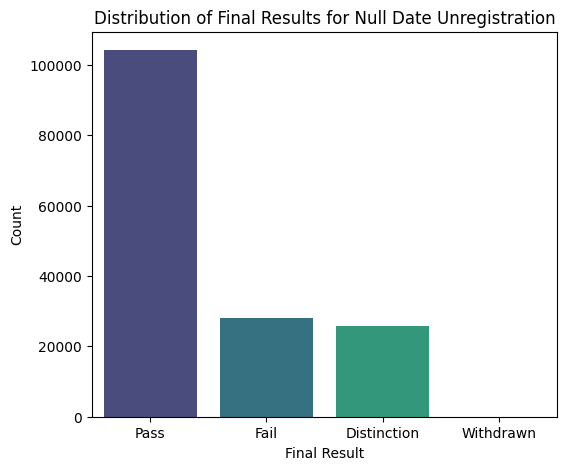

In [14]:
df_null_unregistration = df[df['date_unregistration'].isnull()]

plt.figure(figsize=(6, 5))
sns.countplot(data=df_null_unregistration, x='final_result', palette='viridis')

plt.title('Distribution of Final Results for Null Date Unregistration')
plt.xlabel('Final Result')
plt.ylabel('Count')

plt.show()

There is 04 categories:
- Pass, Fail and Distinction : the student fineshed the test
- Withdrawn : the student didn't finish the test. </br>

So there is a high chance that the missing unregistrated date are related to only to the withdraw categorie

C:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Temp\ipykernel_8912\673022095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_non_null_unregistration, x='final_result', palette='viridis')


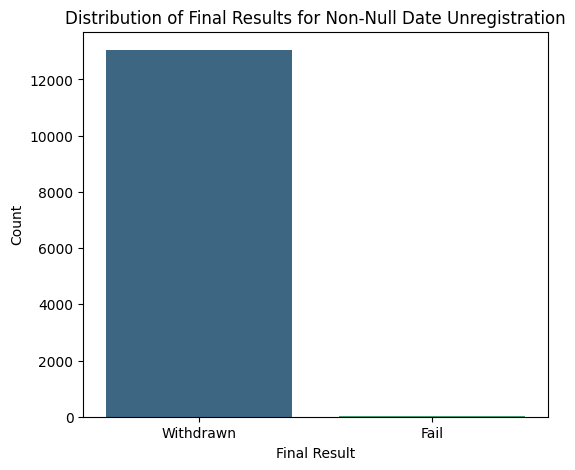

In [15]:
df_non_null_unregistration = df[df['date_unregistration'].notnull()]

plt.figure(figsize=(6, 5))
sns.countplot(data=df_non_null_unregistration, x='final_result', palette='viridis')
plt.title('Distribution of Final Results for Non-Null Date Unregistration')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

Since we can't Impute all of these null values, and we know that date_unregistered is null when a student doesn't complete his study, we can assign finished-unfinished label instead of date_unregisteration, if the final result is (Pass,Fail,Distinction) a student finished, if it's (Withdrawn) student didn't finish

In [16]:
df['study_status'] = df['final_result'].apply(lambda x: 'finished' if x in ['Pass', 'Fail', 'Distinction'] else 'unfinished')

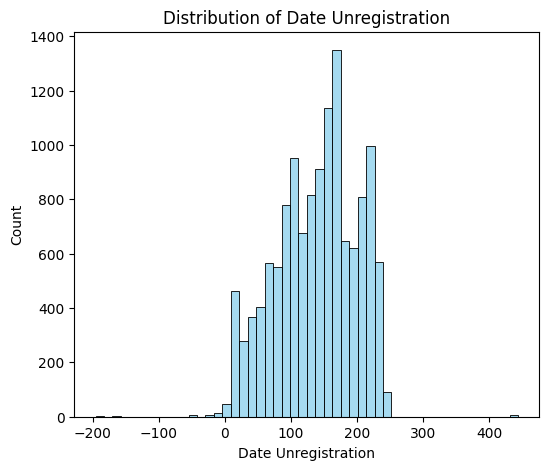

In [17]:
df_non_null = df[df['date_unregistration'].notnull()]

plt.figure(figsize=(6, 5))
sns.histplot(df_non_null['date_unregistration'], bins=50, color='skyblue')
plt.title('Distribution of Date Unregistration')
plt.xlabel('Date Unregistration')
plt.ylabel('Count')
plt.show()

The distribution dosn't realy folow the normal distribution, so let's take another look if we can enhance this

In [18]:
df.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                               0
weight                             0
id_student                         0
date_submitted                     0
is_banked                          0
score                              0
date_registration                  7
date_unregistration           157992
gender                             0
region                             0
highest_education                  0
imd_band                        7481
age_band                           0
num_of_prev_attempts               0
studied_credits                    0
disability                         0
final_result                       0
module_presentation_length         0
study_status                       0
dtype: int64

In [19]:
def categorize_withdrawal(date):
    if pd.isnull(date):
        return "didn't withdraw"
    elif date < 0:
        return 'early withdrawal'
    elif date >=0 and date < 70:
        return 'normal withdrawal'
    else:
        return 'late withdrawal'

df['withdrawal_status'] = df['date_unregistration'].apply(categorize_withdrawal)

df[['date_unregistration', 'withdrawal_status']].head()

,date_unregistration,withdrawal_status
0,NaN,didn't withdraw
1,NaN,didn't withdraw
2,NaN,didn't withdraw
3,NaN,didn't withdraw
4,NaN,didn't withdraw


Since we already extracted useful information from the date_unregistration, we dropping the column as it has many nulls

In [20]:
df.drop(['date_unregistration'],axis=1,inplace=True)
df.isna().sum()

code_module                      0
code_presentation                0
id_assessment                    0
assessment_type                  0
date                             0
weight                           0
id_student                       0
date_submitted                   0
is_banked                        0
score                            0
date_registration                7
gender                           0
region                           0
highest_education                0
imd_band                      7481
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
module_presentation_length       0
study_status                     0
withdrawal_status                0
dtype: int64

imd_band specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
So we can fill the missing value according to the median or the region


In [21]:
regions_list = df[df['imd_band'].isnull()]['region'].unique()

for region in regions_list:
  mode_imd_band = df[df['region'] == region]['imd_band'].mode()[0]
  df.loc[(df['imd_band'].isnull()) & (df['region'] == region), 'imd_band'] = mode_imd_band


In [22]:
df.isna().sum() 

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
date_registration             7
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
dtype: int64

In [23]:
# Only 7 records left in date_registration
df.dropna(inplace=True)
df.isna().sum()

code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
id_student                    0
date_submitted                0
is_banked                     0
score                         0
date_registration             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
dtype: int64